In [1]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

# Quickstart
Questa sezione illustra i fondamenti dell'API di PyTorch.

## Lavorare con i dati
PyTorch ha due [primitive per lavorare con i dati](https://pytorch.org/docs/stable/data.html):
``torch.utils.data.DataLoader`` e ``torch.utils.data.Dataset``.
* ``Dataset`` memorizza gli esempi e le relative etichette
* ``DataLoader`` fornisce un metodo per iterare sugli elementi del
``Dataset``.


In [2]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

torch.manual_seed(42)

PyTorch offre librerie specifiche per domini come [TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html) e [TorchAudio](https://pytorch.org/audio/stable/index.html),
tutte le quali includono insiemi di dati.

Per questo tutorial, useremo un insieme di dati di **TorchVision**.

Il modulo ``torchvision.datasets`` contiene oggetti ``Dataset`` per molti dataset comuni di visione come per esempio
CIFAR, COCO e altri ([elenco completo qui](https://pytorch.org/vision/stable/datasets.html)).

In questo tutorial, utilizziamo l'insieme di dati **FashionMNIST**.

In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10993579.82it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 197663.20it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3669135.97it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10872244.21it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Esploriamo il dataset FashionMNIST

Esploriamo il contenuto dei due ``Dataset``.

Prima di tutto, guardiamo quanti elementi contiene ciascun dataset utilizzando la funzione Python `len()`.

In [4]:
len(training_data), len(test_data)

(60000, 10000)

Quindi `training_data`, il `Dataset` di addestramento del modello, contiene 60000 oggetti, mentre `test_data` ne contiene 10000.

Andiamo ad esplorare il primo elemento di `training_data`.

In [5]:
print(training_data[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

Scopriamo così che gli elementi di `training_data` sono delle *tuple*, cioè coppie di elementi.

Il primo elemento di ciascuna coppia è un oggetto `tensor` e il secondo elemento un numero.

Per meglio vederli assegniamo ciascun elemento ad una variabile e interroghiamone le caratteristiche.

In [6]:
X0, y0 = training_data[0]
print('Tipo del primo elemento: ', type(X0))
print('Forma e dimensioni del primo elemento: ', X0.shape)
print('Tipo dei contenuti del primo elemento: ', X0.dtype)
print('Tipo secondo elemento: ', type(y0))

Tipo del primo elemento:  <class 'torch.Tensor'>
Forma e dimensioni del primo elemento:  torch.Size([1, 28, 28])
Tipo dei contenuti del primo elemento:  torch.float32
Tipo secondo elemento:  <class 'int'>


* Il primo elemento è un oggetto che appartiene alla classe [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html).
* Il secondo elemento è un numero intero, `int`.
* Il primo elemento ha dimensione 1x28x28 e contiene dei numeri in virgola mobile, `torch.float32`.

Possiamo trattare il primo elemento come un'immagine, un'immagine con un solo canale (quindi in scala di grigio) e con dimensioni in pixel 28x28.

La libreria `matplotlib` è solitamente usata in Python per visualizzare le immagini.

Possiamo usarla per visualizzare il contenuto del primo (e unico) canale dell'immagine, cioè il canale 0.

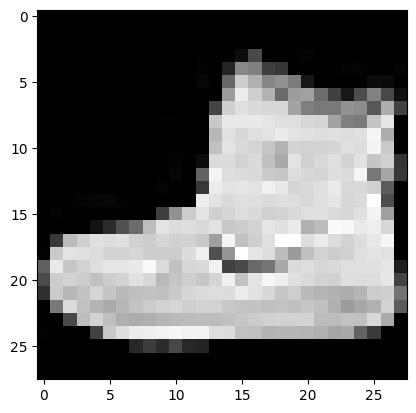

In [7]:
from matplotlib import pyplot as plt

channel=0
plt.imshow(X0[channel,...], cmap='gray')

Abbiamo scoperto che `training_data`, e analogamente si può verificare `test_data`, contengono un insieme di coppie (*tuple*).

Il primo elemento di ciascuna coppia è un'immagine di un vestiario, nel caso precedente sembra essere uno scarpone, e il secondo elemento è un numero.

La descrizione del dataset [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) conferma la nostra analisi e ci informa anche che ogni numero è un'etichetta della categoria dell'oggetto ritratto nell'immagine.

Qui di seguito ho riportato per comodità le 10 etichette e la loro descrizione.

| Label |	Description |
| ----- | ----------- |
| 0	| T-shirt/top |
| 1	| Trouser |
| 2	| Pullover |
| 3	| Dress |
| 4	| Coat |
| 5	| Sandal |
| 6	| Shirt |
| 7	| Sneaker |
| 8	| Bag |
| 9	| Ankle boot |

## Il DataLoader

Passiamo il ``Dataset`` come argomento a ``DataLoader``. Questo produce un iterabile sul nostro insieme di dati che supporta diverse funzionalità frequentemente utilizzate per il Machine Learning:

*   l'aggregazione (*batching*)
*   il campionamento (*sampling*)
*   la mescolatura casuale (*shuffling*)
* il caricamento parallelo dei dati.

Qui usiamo l'aggregazione e definiamo una dimensione del *batch* di 64, cioè ogni elemento nell'iterabile del dataloader restituirà un blocco di 64 coppie di immagini ed etichette.



In [8]:
batch_size = 64

# Crea i data loader.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Forma e dimensioni di X [N, C, H, W]: {X.shape}")
    print(f"Forma e dimensioni di y [N]: {y.shape} {y.dtype}")
    break

Forma e dimensioni di X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Forma e dimensioni di y [N]: torch.Size([64]) torch.int64


La prima dimensione ci permette di accedere agli `N` elementi, 64 in questo caso, presenti in ciascun blocco.

A questo punto abbiamo caricato i dati e sappiamo come accedervi.

Passiamo a costruire la prima semplice rete neurale che elaborerà questi dati.

Per maggiori informazioni: [DATASETS & DATALOADERS](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).




--------------




# Architettura della Rete Neurale

Creiamo ora una semplice rete neurale che riceve in ingresso delle immagini con 28x28 pixel (quindi 784 pixel) e in uscita attiva 10 neuroni per classificare l'immagine in una delle 10 categorie precedenti.

Per ora non useremo reti convoluzionali ma le reti neurali *fully connected* (il *Perceptron* e il *Multi Layer Perceptron* sono reti neurali fully connected).

Per iniziare useremo il **Perceptron**.

### Codice per generare il diagramma architetturale

In [9]:
!pip install svgwrite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.3 MB/s eta 0:00:00


In [10]:
import svgwrite
from IPython.display import SVG, display

In [11]:
def create_mlp_svg(input_neurons, output_neurons, input_label, output_label, hidden_layers=[], hidden_labels=([], [])):
    # Define the colors for the input, hidden, and output layers
    layer_colors = ['#89CFF0', '#C3B1E1', '#FDE910']

    # Set the vertical distance between neurons and the radius of the circles
    vdist = 100
    radius = 20
    top_margin = 60  # space for layer labels

    # Calculate the width and height of the diagram
    max_neurons = max([input_neurons] + hidden_layers + [output_neurons])
    width = (len(hidden_layers) + 2) * 2 * radius * 3
    height = max_neurons * vdist + top_margin

    # Create a new SVG drawing
    dwg = svgwrite.Drawing('mlp.svg', size=(width, height))

    # Add an arrowhead marker to the drawing
    arrow_marker = dwg.marker(insert=(5,5), size=(5,5), orient='auto')
    arrow_marker.add(dwg.path(d='M 0 0 L 10 5 L 0 10 z', fill='black'))
    dwg.defs.add(arrow_marker)

    # Helper function to calculate neuron positions
    def neuron_positions(neurons, layer_index):
        x_offset = (2 * radius * 3) * layer_index + radius * 3
        return [(x_offset, i * 2 * radius * 1.5 +
         (height - neurons * 2 * radius * 1.5) / 2) for i in range(neurons)]

    # Function to draw connections between layers
    def draw_connections(layer1, layer2):
        for (x1, y1) in layer1:
            for (x2, y2) in layer2:
                dwg.add(dwg.line(start=(x1+radius, y1), end=(x2-radius, y2),
                                 stroke='black', stroke_width=1,
                                 marker_end=arrow_marker.get_funciri()))

    # Function to draw a single layer
    def draw_layer(neuron_positions, color):
        for x, y in neuron_positions:
            dwg.add(dwg.circle(center=(x, y), r=radius, fill=color))

    # Function to draw layer labels with the number of nodes on a second row
    def draw_layer_label(x, label, nodes):
        text = dwg.text("", insert=(x, top_margin / 2), text_anchor="middle",
                        font_size="16px", font_family="Arial")
        text.add(dwg.tspan(label, x=[x], dy=["1.2em"])) # Position the layer name
        text.add(dwg.tspan(nodes, x=[x], dy=["1.2em"])) # Position the number of nodes on the next line
        dwg.add(text)

    # Calculate neuron positions for all layers
    all_neuron_positions = [
        neuron_positions(input_neurons, 0)
    ] + [
        neuron_positions(n, i + 1) for i, n in enumerate(hidden_layers)
    ] + [
        neuron_positions(output_neurons, len(hidden_layers) + 1)
    ]

    # Draw all layers and their labels
    layer_labels = [(input_label[0], f"({input_label[1]})")] + \
                   [(label, f"({n})") for label, n in zip(hidden_labels[0], hidden_labels[1])] + \
                   [(output_label[0], f"({output_label[1]})")]
    # Draw all layers
    for i, (positions, (label, nodes)) in enumerate(zip(all_neuron_positions, layer_labels)):
        draw_layer(positions, layer_colors[min(i, len(layer_colors) - 1)])
        draw_layer_label(positions[len(positions) // 2][0], label, nodes)

    # Draw connections between all layers
    for i in range(len(all_neuron_positions) - 1):
        draw_connections(all_neuron_positions[i], all_neuron_positions[i + 1])

    dwg.save()

    # Return the SVG xml to display
    return dwg.tostring()

### Diagramma architetturale del Perceptron

A differenza del Perceptron classico non useremo un solo neurone di uscita ma un neurone di uscita per ognuna delle 10 classi.

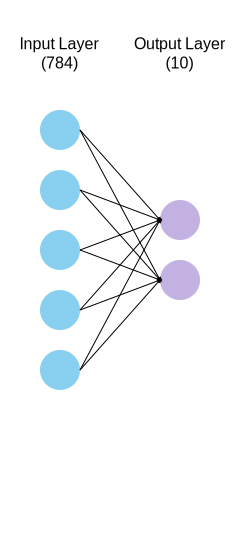

In [12]:
input_label = ("Input Layer", 784)
output_label = ("Output Layer", 10)
svg_data = create_mlp_svg(input_neurons=5, output_neurons=2,
                          input_label=input_label, output_label=output_label)
display(SVG(svg_data))

Per semplificare il diagramma il numero dei neuroni rappresentati non corrisponde al numero di neuroni che andremo effettivamente ad utilizzare. Il numero dei neuroni effettivo è scritto nell'etichetta in alto in corrispondenza a ciascuno strato.

Come vedete, in una rete neurale di questo tipo, ogni neurone di uno strato è collegato ad ogni neurone dello strato successivo.

Le frecce rappresentano il flusso in avanti dei calcoli.

All'ingresso avremo 784 neuroni per poter leggere tutti i valori dei 28x28 pixel dell'immagine in ingresso.

In uscita avremo 10 neuroni, ciascun neurone è legato all'etichetta che rappresenta l'immagine. Il neurone che, al termine dei calcoli, conterrà il valore più alto ci dirà a quale categoria appartiene l'immagine.

## Creazione del Modello

In [13]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


Per definire una rete neurale in PyTorch, creiamo una classe che eredita da [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).

Definiamo gli strati della rete
nella funzione ``__init__`` e specifichiamo come i dati passeranno attraverso la rete nella funzione ``forward``.


In [14]:
# Define perceptron model
class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sigmoid = nn.Sequential(
            nn.Linear(28*28, 10),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_sigmoid(x)
        return logits

Creiamo un'istanza del modello e visualizziamone il contenuto.

In [15]:
model = Perceptron().to(device)
model

Perceptron(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_sigmoid): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): Sigmoid()
  )
)

Un'altra opzione è quella di usare la funzione `summary` che fornisce ulteriori dettagli.

In particolare vediamo per ogni strato il tipo, la forma (shape) del risultato di uscita dello strato e il numero di parametri (pesi) associati allo strato. Inoltre, la funzione riporta anche il numero totale di parametri. Questa è una prima indicazione della complessità del modello.

In [16]:
from torchsummary import summary

summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                   [-1, 10]           7,850
           Sigmoid-3                   [-1, 10]               0
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


## Digressione: la funzione di uscita Sigmoide

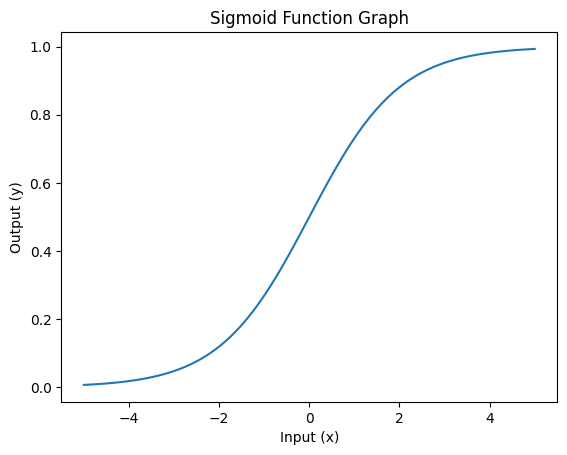

In [17]:
# Create input values
x = torch.linspace(-5, 5, 100)

# Calculate sigmoid outputs
y = F.sigmoid(x)

# Plot the graph
plt.plot(x.numpy(), y.numpy())

# Add labels and title
plt.xlabel("Input (x)")
plt.ylabel("Output (y)")
plt.title("Sigmoid Function Graph")

# Show the plot
plt.show()


## Il metodo `forward`

Proviamo ora ad usare la rete neurale che abbiamo appena creato grazie al suo metodo `forward`.

Usiamo come input il blocco `X` di 64 immagini che avevamo caricato precedentemente.

Esaminiamo poi il valore dei 10 neuroni per il primo elemento del blocco.

In [18]:
logits = model.forward(X)
print(logits[0].data)

tensor([0.4597, 0.5110, 0.5411, 0.5100, 0.4479, 0.3829, 0.5486, 0.4918, 0.5313,
        0.4481])


Come avevo detto precedentemente il neurone che contiene il valore maggiore rappresenta la classe associata all'oggetto rappresentata.

Vi ricordo che la prima immagine era uno scarpone con l'etichetta numero 9.

Quindi ci aspetteremmo che l'ultimo neurone, poiché le etichette sono numerate da 0 a 9, sia quello con il valore numerico più alto.

Purtroppo però, se andiamo ad esaminare il risultato precedente, questo non si verifica.

La rete neurale non sembra quindi funzionare. Perché?

Perché non è stata addestrata, cioè non abbiamo appreso i pesi, l'intensità con cui le varie connessioni tra i neuroni devono funzionare per poter riconoscere correttamente le immagini di ingresso.

L'addestramento è quello che faremo nella fase successiva.

Per maggiorni informazioni: [building neural networks in PyTorch](buildmodel_tutorial.html).




### Che cosa fa la funzione `forward`?

Iniziamo esaminando i parametri della rete neurale.

In [19]:
for name, p in model.named_parameters():
  print(f"Parametro: {name}; Forma: {p.shape}")

Parametro: linear_sigmoid.0.weight; Forma: torch.Size([10, 784])
Parametro: linear_sigmoid.0.bias; Forma: torch.Size([10])


Dalla lezione teorica abbiamo appreso che il percettrone è equivalente alla seguente operazione matematica tra matrici

$o = \sigma(\bf{x} * \bf{w} + \bf{b})$

dove

*   $\sigma$ è la funzione sigmoide
*   $\bf{x}$ è la matrice di input
*   $\bf{w}$ è la matrice dei pesi
*   $\bf{b}$ è la matrice dei *bias*

Andiamo ora ad osservare il contenuto iniziale dei pesi e del bias

In [20]:
w = model.linear_sigmoid[0].weight
b = model.linear_sigmoid[0].bias
print("Pesi w =", w.data)
print("")
print("Bias b =", b.data)

Pesi w = tensor([[-0.0084,  0.0328, -0.0078,  ...,  0.0135, -0.0188, -0.0354],
        [ 0.0187,  0.0085, -0.0182,  ...,  0.0115, -0.0008,  0.0017],
        [ 0.0045,  0.0133, -0.0108,  ...,  0.0059,  0.0100,  0.0273],
        ...,
        [-0.0344,  0.0127, -0.0325,  ..., -0.0011, -0.0230,  0.0257],
        [ 0.0291,  0.0243, -0.0006,  ...,  0.0001,  0.0176, -0.0147],
        [ 0.0053, -0.0194, -0.0170,  ...,  0.0205, -0.0093,  0.0283]])

Bias b = tensor([-0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,  0.0163,
         0.0069, -0.0078])


Se vogliamo invece vedere forma e dimensioni di queste due matrici possiamo usare il metodo `shape`

In [21]:
print("Forma della matrice w dei pesi:", w.shape)
print("")
print("Forma della matrice b con i bias:", b.shape)

Forma della matrice w dei pesi: torch.Size([10, 784])

Forma della matrice b con i bias: torch.Size([10])


### Il calcolo effettuato dalla funzione `forward`

Per il nostro caso la funzione `forward` sta usando la formula del percettrone per ogni $i$-mo neurone di uscita

$l_i = \sum_{j=1}^{784}{\left(x_{j} * w_{ij}\right)} + b_i$

$o_i = f\left( l_i \right)$

dove
* $x_j$ con $j$ che varia da 1 a 784 sono i 784 pixel di ogni immagine di ingresso
* $w_{ij}$ sono i pesi che collegano ciascuno dei 784 neuroni di ingresso a ciascuno dei 10 neuroni di uscita
* $b_i$ sono altri parametri chiamati *bias*, uno per ognuno dei 10 neuroni di uscita
* $o_i$ è il valore dell'$i$-simo
* $f$ è la funzione sigmoide

Verifichiamolo con il codice seguente

Prima di tutto trasformiamo le immagini dal loro formato bi-dimensionale ad un formato monodimensionale (questa fase si chiama flattening).

In [22]:
flattened_input = X.view(len(X),-1)
flattened_input.shape

torch.Size([64, 784])

Ora eseguiamo, sfruttando le proprietà di calcolo delle matrici, la fase di calcolo lineare, cioè questa formula

$\sum_{j=1}^{784}{(x_{j} * w_{ij})} + b_i$

In [23]:
l = flattened_input @ w.T + b
l.shape

torch.Size([64, 10])

In [24]:
output = F.sigmoid(l)

Verifichiamo che i risultati ottenuti con il calcolo esplicito e con la funzione `forward` coincidano

In [25]:
print(f"output[0] = {output[0].data}\nlogits[0] = {logits[0].data}")

output[0] = tensor([0.4597, 0.5110, 0.5411, 0.5100, 0.4479, 0.3829, 0.5486, 0.4918, 0.5313,
        0.4481])
logits[0] = tensor([0.4597, 0.5110, 0.5411, 0.5100, 0.4479, 0.3829, 0.5486, 0.4918, 0.5313,
        0.4481])


La funzione `forward` quindi **esegue** il grafo computazionale creato quando abbiamo creato la rete neurale.

### Distribuzione iniziale dei pesi

(array([777., 770., 810., 827., 754., 776., 811., 721., 804., 790.]),
 array([-3.57103832e-02, -2.85693128e-02, -2.14282423e-02, -1.42871728e-02,
        -7.14610284e-03, -5.03286719e-06,  7.13603711e-03,  1.42771071e-02,
         2.14181766e-02,  2.85592470e-02,  3.57003175e-02]),
 <BarContainer object of 10 artists>)

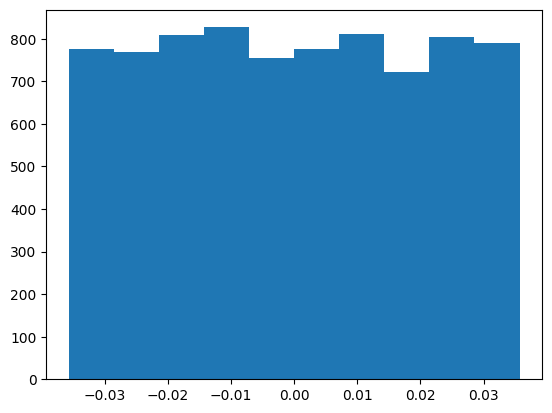

In [26]:
plt.hist(w.detach().numpy().reshape(-1))

--------------




## Addestramento della rete neurale

Per addestrare un modello, abbiamo bisogno di una [funzione di costo](https://pytorch.org/docs/stable/nn.html#loss-functions) (chiamata *loss*) e di un [algoritmo di ottimizzazione](https://pytorch.org/docs/stable/optim.html) (chiamato *optimizer*).

La funzione di costo misura quanto è lontana la predizione del modello dalla risposta attesa.

L'ottimizzatore è un metodo con cui vengono calcolati le quantità con cui i pesi delle connessioni devono essere modificati per diminuire l'errore tra la predizione e la risposta attesa.

Nel caso precedente avremmo dovuto modificare i pesi delle connessioni, che inizialmente hanno dei valori casuali, per aumentare il valore presente nel decimo neurone di uscita e diminuire invece tutti gli altri.

In PyTorch esistono diverse funzioni di costo e diversi metodi di ottimizzazione.

Per il nostro caso useremo quelli più comuni.

Poiché dobbiamo classificare delle immagini la funzione di costo più comune si chiama [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) mentre l'algoritmo di ottimizzazione più semplice si chiama *Stochastic Gradient Descent* [`SGD`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html).


In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

I parametri del percettrone, cioè i pesi e i bias, sono modificabili dall'ottimizzatore. Questo lo si vede stampando la loro espressione. Entrambi sono degli oggetti di tipo `torch.tensor`, cioè delle matrici in PyTorch, con la proprietà `requires_grad` vera.

In [28]:
print(w)
print(b)

Parameter containing:
tensor([[-0.0084,  0.0328, -0.0078,  ...,  0.0135, -0.0188, -0.0354],
        [ 0.0187,  0.0085, -0.0182,  ...,  0.0115, -0.0008,  0.0017],
        [ 0.0045,  0.0133, -0.0108,  ...,  0.0059,  0.0100,  0.0273],
        ...,
        [-0.0344,  0.0127, -0.0325,  ..., -0.0011, -0.0230,  0.0257],
        [ 0.0291,  0.0243, -0.0006,  ...,  0.0001,  0.0176, -0.0147],
        [ 0.0053, -0.0194, -0.0170,  ...,  0.0205, -0.0093,  0.0283]],
       requires_grad=True)
Parameter containing:
tensor([-0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,  0.0163,
         0.0069, -0.0078], requires_grad=True)


Il fatto che `requires_grad` sia vera permette al differenzioatore automatico di PyTorch `torch.autograd` di calcolare il gradiente.

Questo è usato dall'ottimizzatore per aggiustare i parametri come abbiamo visto nella presentazione teorica.

Scriviamo ora la funzione `train` che permette di eseguire l'addestramento.



In [29]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In un singolo ciclo di addestramento, il modello effettua previsioni sull'insieme di dati di addestramento (fornito ad esso a lotti, *batch*), e retropropaga l'errore di previsione per aggiustare i parametri del modello.

Controlliamo anche con la funzione `test` le prestazioni del modello rispetto all'insieme di dati di test per garantire che stia imparando.


In [30]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Il processo di addestramento viene condotto su diverse iterazioni (*epoche*).

Durante ciascuna epoca, il modello impara i parametri per effettuare previsioni migliori.

Se stampiamo l'accuratezza e la `loss` del modello ad ogni epoca; ci aspettiamo che l'accuratezza aumenti e la `loss` diminuisca ad ogni epoca.


In [31]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.307968  [   64/60000]
loss: 2.285416  [ 6464/60000]
loss: 2.268667  [12864/60000]
loss: 2.256857  [19264/60000]
loss: 2.258343  [25664/60000]
loss: 2.223238  [32064/60000]
loss: 2.232352  [38464/60000]
loss: 2.203572  [44864/60000]
loss: 2.215438  [51264/60000]
loss: 2.183154  [57664/60000]
Test Error: 
 Accuracy: 45.7%, Avg loss: 2.183544 

Epoch 2
-------------------------------
loss: 2.198106  [   64/60000]
loss: 2.186970  [ 6464/60000]
loss: 2.158640  [12864/60000]
loss: 2.168064  [19264/60000]
loss: 2.158625  [25664/60000]
loss: 2.123485  [32064/60000]
loss: 2.148849  [38464/60000]
loss: 2.116542  [44864/60000]
loss: 2.137063  [51264/60000]
loss: 2.100657  [57664/60000]
Test Error: 
 Accuracy: 58.2%, Avg loss: 2.109524 

Epoch 3
-------------------------------
loss: 2.127517  [   64/60000]
loss: 2.122392  [ 6464/60000]
loss: 2.087182  [12864/60000]
loss: 2.106238  [19264/60000]
loss: 2.091198  [25664/60000]
loss: 2.062105  [32064/600

### Distribuzione dei pesi dopo l'addestramento

Se ora andiamo a vedere l'istogramma dei pesi dopo l'addestramento vediamo che sono stati modificati rispetto alla distribuzione casuale e uniforme iniziale.

(array([  36.,  245.,  797., 1344., 1498., 1511., 1271.,  837.,  259.,
          42.]),
 array([-0.07122365, -0.05733281, -0.04344197, -0.02955113, -0.0156603 ,
        -0.00176946,  0.01212138,  0.02601222,  0.03990306,  0.0537939 ,
         0.06768473]),
 <BarContainer object of 10 artists>)

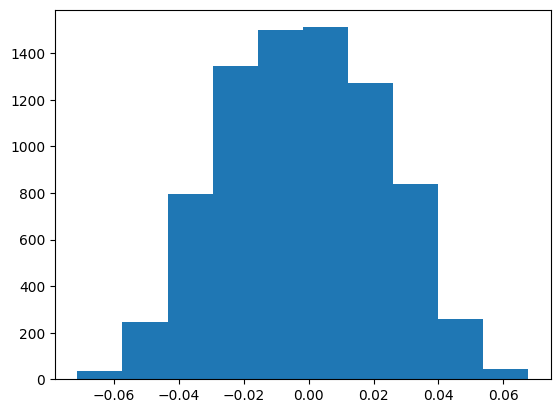

In [32]:
w = model.linear_sigmoid[0].weight.data
plt.hist(w.detach().numpy().reshape(-1))

Per approfondimenti [Training your model](optimization_tutorial.html).




## Multi Layer Perceptron

Ora che abbiamo visto le basi passiamo a vedere come si comporta una rete più grande, in particolare un *Multi Layer Perceptron* sullo stesso dataset.

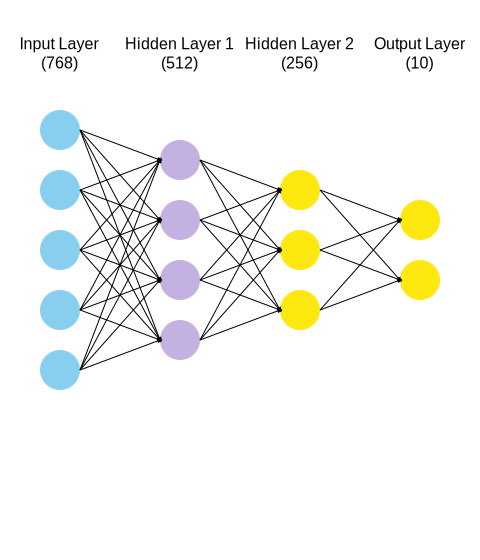

In [33]:
input_label = ("Input Layer", 768)
hidden_labels = (["Hidden Layer 1", "Hidden Layer 2"], [512, 256])
output_label = ("Output Layer", 10)
svg_data = create_mlp_svg(input_neurons=5, output_neurons=2,
                          input_label=input_label, output_label=output_label,
                          hidden_layers=[4,3], hidden_labels=hidden_labels)
display(SVG(svg_data))

Creiamo un nuovo modello ereditando sempre dalla classe `nn.Module`

In [34]:
# Define model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [35]:
model = MLP().to(device)
model

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [36]:
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 256]         131,328
              ReLU-5                  [-1, 256]               0
            Linear-6                   [-1, 10]           2,570
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.04
Estimated Total Size (MB): 2.06
----------------------------------------------------------------


## La funzione di uscita ReLU

Come anticipato nel corso teorico vi sono diverse funzioni di attivazione oltre alla funzione sigmoide. Una delle più usate è la funzione **ReLU** mostrata nel grafico seguente.

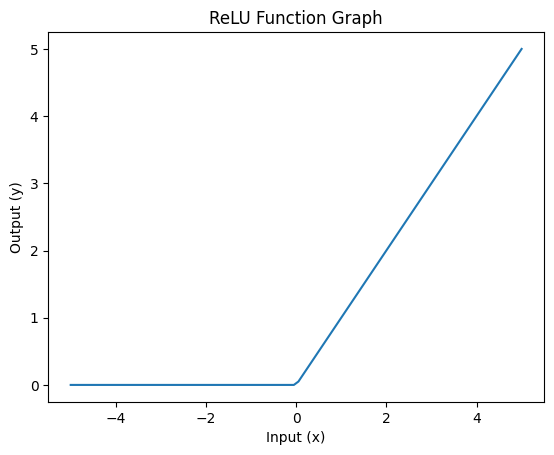

In [37]:
# Calculate relu outputs
y = F.relu(x)

# Plot the graph
plt.plot(x.numpy(), y.numpy())

# Add labels and title
plt.xlabel("Input (x)")
plt.ylabel("Output (y)")
plt.title("ReLU Function Graph")

# Show the plot
plt.show()

### Addestramento del MLP

In [38]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.283899  [   64/60000]
loss: 2.277833  [ 6464/60000]
loss: 2.261746  [12864/60000]
loss: 2.259645  [19264/60000]
loss: 2.251892  [25664/60000]
loss: 2.218285  [32064/60000]
loss: 2.224862  [38464/60000]
loss: 2.193623  [44864/60000]
loss: 2.191847  [51264/60000]
loss: 2.151511  [57664/60000]
Test Error: 
 Accuracy: 52.0%, Avg loss: 2.150421 

Epoch 2
-------------------------------
loss: 2.159444  [   64/60000]
loss: 2.143008  [ 6464/60000]
loss: 2.093543  [12864/60000]
loss: 2.100898  [19264/60000]
loss: 2.063800  [25664/60000]
loss: 2.005857  [32064/60000]
loss: 2.024153  [38464/60000]
loss: 1.956790  [44864/60000]
loss: 1.964518  [51264/60000]
loss: 1.868540  [57664/60000]
Test Error: 
 Accuracy: 56.7%, Avg loss: 1.884529 

Epoch 3
-------------------------------
loss: 1.922421  [   64/60000]
loss: 1.883211  [ 6464/60000]
loss: 1.781978  [12864/60000]
loss: 1.804715  [19264/60000]
loss: 1.720820  [25664/60000]
loss: 1.670771  [32064/600

Per migliorare le prestazioni utilizziamo dei pesi iniziali più sofisticati.

Il metodo è descritto in *Understanding the difficulty of training deep feedforward neural networks* - Glorot, X. & Bengio, Y. (2010).
Il valore dei parametri iniziali deriva da una distribuzione uniforme che varia nell'intervallo $[-a, a]$ dove

$a = \sqrt{\frac{6}{\text{fan}_{\text{in}} + \text{fan}_{\text{out}}}}$

dove

* $\text{fan}_{\text{in}}$ è il numero di *input* di ciascun strato
* $\text{fan}_{\text{out}}$ è il numero di *output* di ciascun strato

Questa inizializzazione è chiamata inizializzazione di Glorot (vd. [`torch.nn.init`](https://pytorch.org/docs/stable/nn.init.html))

In [39]:
def init_xavier(module):
    if type(module) == nn.Linear:
        nn.init.xavier_uniform_(module.weight)

model.apply(init_xavier)

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)

Proviamo quindi un ulteriore addestramento con i nuovi pesi iniziali.

In [40]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.334577  [   64/60000]
loss: 2.099270  [ 6464/60000]
loss: 1.854159  [12864/60000]
loss: 1.819810  [19264/60000]
loss: 1.657522  [25664/60000]
loss: 1.509728  [32064/60000]
loss: 1.484416  [38464/60000]
loss: 1.323790  [44864/60000]
loss: 1.351630  [51264/60000]
loss: 1.211875  [57664/60000]
Test Error: 
 Accuracy: 67.2%, Avg loss: 1.202018 

Epoch 2
-------------------------------
loss: 1.246797  [   64/60000]
loss: 1.240490  [ 6464/60000]
loss: 0.993579  [12864/60000]
loss: 1.159785  [19264/60000]
loss: 1.025352  [25664/60000]
loss: 1.002110  [32064/60000]
loss: 1.041396  [38464/60000]
loss: 0.942205  [44864/60000]
loss: 0.996884  [51264/60000]
loss: 0.919795  [57664/60000]
Test Error: 
 Accuracy: 71.8%, Avg loss: 0.910210 

Epoch 3
-------------------------------
loss: 0.915646  [   64/60000]
loss: 0.993234  [ 6464/60000]
loss: 0.732886  [12864/60000]
loss: 0.962008  [19264/60000]
loss: 0.839752  [25664/60000]
loss: 0.837541  [32064/600

## Salvataggio dei Modelli
Un modo comune per salvare un modello è serializzare il dizionario di stato interno (contenente i parametri del modello).



In [41]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## Caricamento dei Modelli

Il processo per caricare un modello include la ricreazione della struttura del modello e il caricamento del dizionario di stato al suo interno.



In [42]:
model = MLP().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

Questo modello può ora essere utilizzato per effettuare previsioni.


In [43]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predetto: "{predicted}", Atteso: "{actual}"')

Predetto: "Ankle boot", Atteso: "Ankle boot"


Per approfondimenti:[Saving & Loading your model](saveloadrun_tutorial.html).


